In [5]:
import pandas as pd
from datetime import datetime

weather_data_filepath = "data/weather_data.csv"
electricity_data_filepath = "data/electricity_production_data.csv"

df_weather = pd.read_csv(weather_data_filepath, delimiter=',')
df_electricity = pd.read_csv(electricity_data_filepath, delimiter=',')

df_weather['time'] = pd.to_datetime(df_weather['referenceTime'])
df_weather['time'] = df_weather['time'].dt.tz_localize(None)
df_electricity['time'] = pd.to_datetime(df_electricity['måned'], format='%YM%m')
df_weather = df_weather.drop(columns="referenceTime")
df_electricity = df_electricity.drop(columns="måned")

df_weather['month_year'] = df_weather['time'].dt.strftime('%Y-%m')
df_electricity['month_year'] = df_electricity['time'].dt.strftime('%Y-%m')

df_weather.set_index('month_year', inplace=True)
df_electricity.set_index('month_year', inplace=True)

In [6]:
df_weather.head()

,value,time
month_year,,
1950-12,16.5,1950-12-31 23:00:00
1951-01,7.9,1951-01-31 23:00:00
1951-02,36.8,1951-02-28 23:00:00
1951-03,35.4,1951-03-31 23:00:00
1951-04,29.0,1951-04-30 23:00:00


In [7]:
df_electricity.head()

,value,time
month_year,,
1993-01,698737,1993-01-01
1993-02,654965,1993-02-01
1993-03,673560,1993-03-01
1993-04,488486,1993-04-01
1993-05,465860,1993-05-01


<Axes: xlabel='time', ylabel='value'>

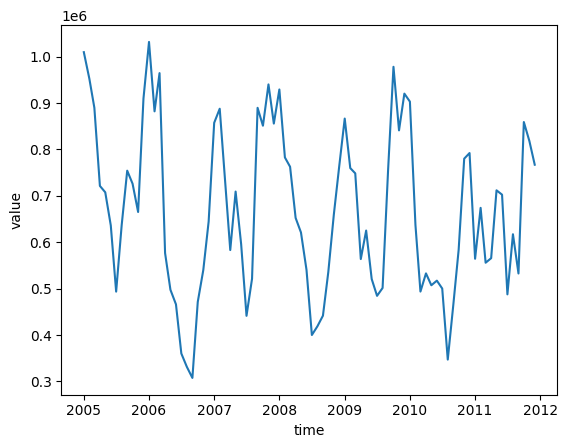

In [12]:
import seaborn as sns
sns.lineplot(x='time', y='value', data=df_electricity[df_electricity['time'].dt.year >= 2005])

<Axes: xlabel='time', ylabel='value'>

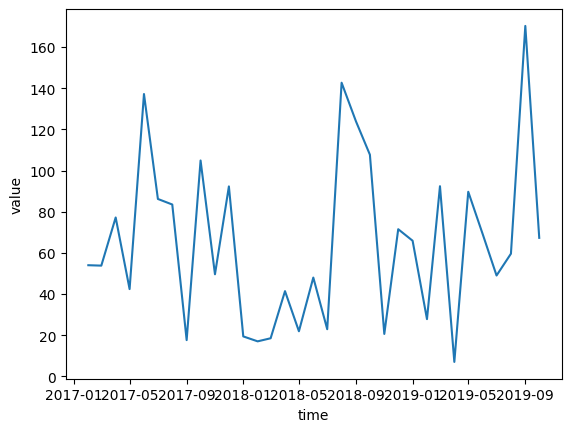

In [16]:
sns.lineplot(x='time', y='value', data=df_weather[df_weather['time'].dt.year >= 2017])

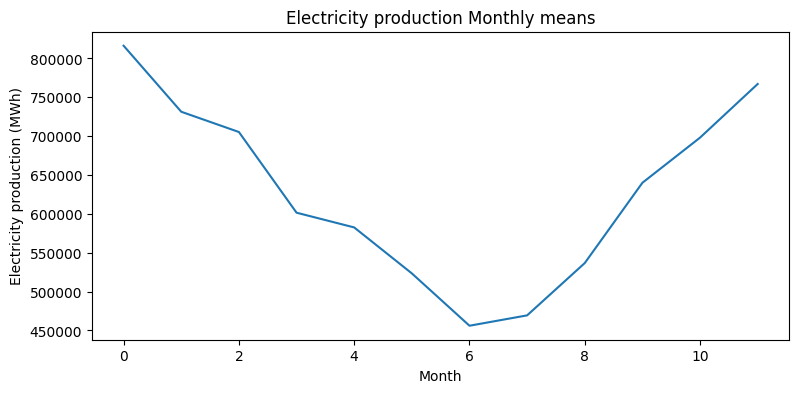

In [41]:
import matplotlib.pyplot as plt

df_electricity['month'] = df_electricity['time'].dt.month
monthly_mean = df_electricity.groupby('month')['value'].mean()

plt.figure(figsize=(9,4))
plt.plot(monthly_mean.values)
plt.xlabel("Month")
plt.ylabel("Electricity production (MWh)")
plt.title("Electricity production Monthly means")
plt.show()

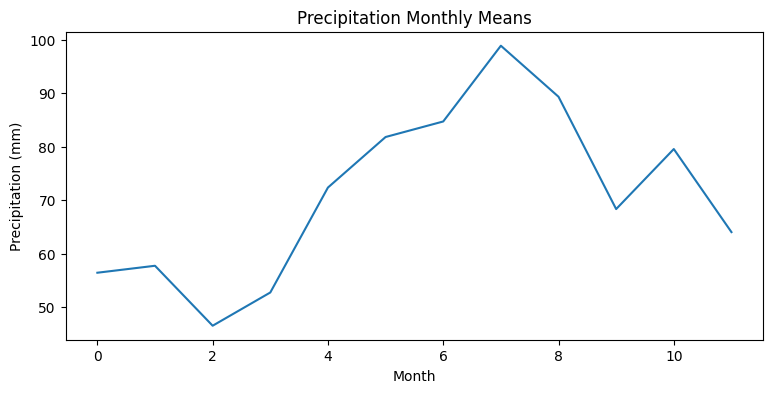

In [42]:
df_weather['month'] = df_weather['time'].dt.month
monthly_mean_weather = df_weather.groupby('month')['value'].mean()

plt.figure(figsize=(9,4))
plt.plot(monthly_mean_weather.values)
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.title("Precipitation Monthly Means")
plt.show()

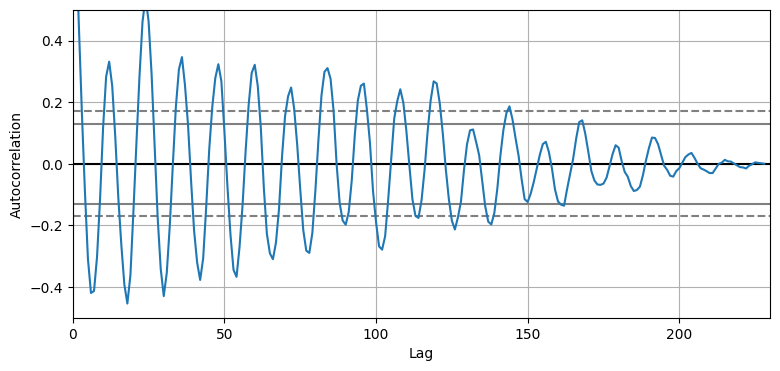

In [50]:
from pandas.plotting import autocorrelation_plot
diff_elec = df_electricity.diff(12).dropna()
diff_weather = df_electricity.diff(12).dropna()
plt.figure(figsize=(9,4))
autocorrelation_plot(df_electricity['value'])
plt.xlim(0, 230)
plt.ylim(-0.5, 0.5)
plt.show()

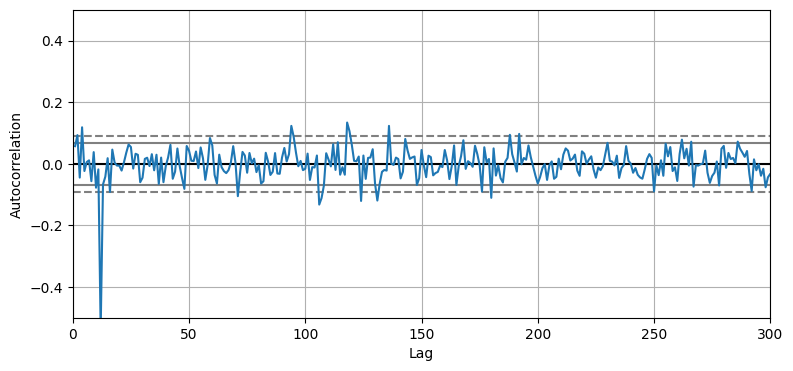

In [ ]:
plt.figure(figsize=(9,4))
autocorrelation_plot(df_weather['value'])
plt.xlim(0, 300)
plt.ylim(-0.5, 0.5)
plt.show()

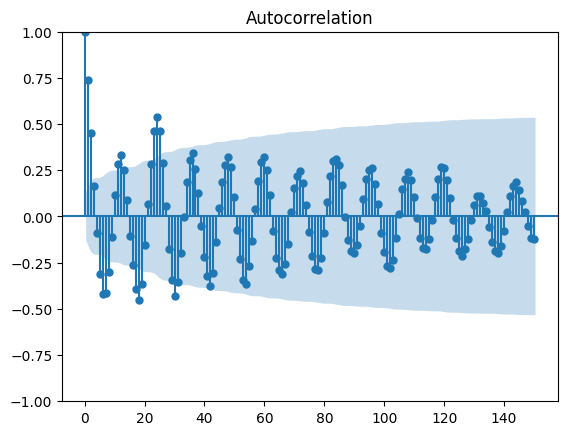

In [54]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_electricity['value'], lags=150)
plt.show()

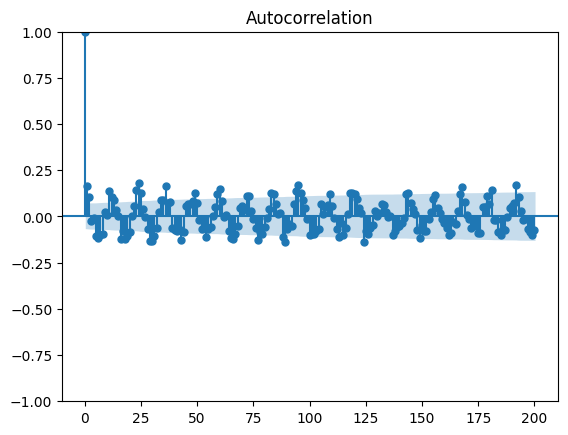

In [56]:
plot_acf(df_weather['value'], lags=200)
plt.show()

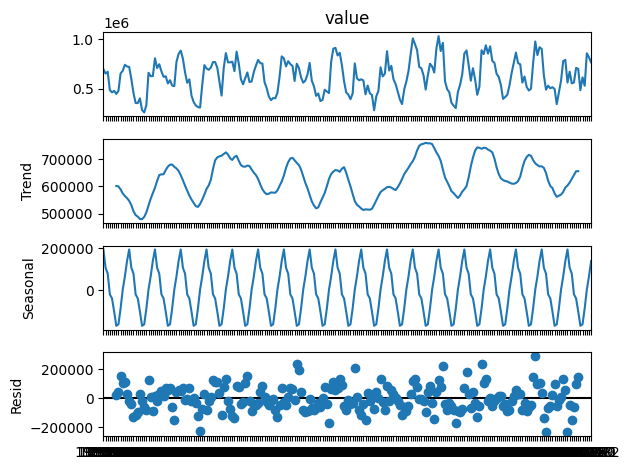

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(df_electricity['value'],model='additive',period=12)
decomposition.plot()
plt.show()

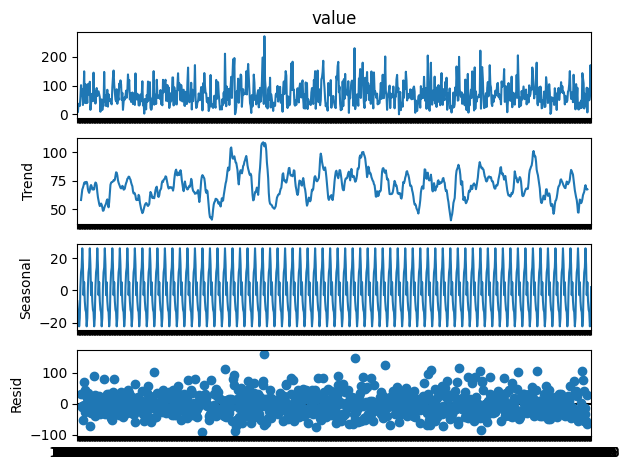

In [37]:
decomposition=seasonal_decompose(df_weather['value'],model='additive',period=12)
decomposition.plot()
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_electricity.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.292371473759111
2. P-Value :  5.6784412662913794e-06
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 213
5. Critical Values :
	 1% :  -3.461429147102264
	 5% :  -2.875206950587861
	 10% :  -2.5740544497344002


In [40]:
dftest = adfuller(df_weather.value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.412360739804038
2. P-Value :  7.079276075934034e-11
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 806
5. Critical Values :
	 1% :  -3.438489266223099
	 5% :  -2.8651325741144573
	 10% :  -2.5686830088234025
